In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
df = pd.read_csv('mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.isna().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [6]:
X = df.drop('Virus Present', axis = 1)
y = df['Virus Present']

In [7]:
# here, C is inversly proportional with the C that we study in the equations (in 02-SVM_interpretation)
model = SVC(kernel = 'linear', C= 10000)

In [8]:
model.fit(X,y)

SVC(C=10000, kernel='linear')

In [9]:
model.support_vectors_

array([[6.68307209, 5.19427732],
       [5.27060321, 6.6968394 ],
       [4.85999842, 5.29248262]])

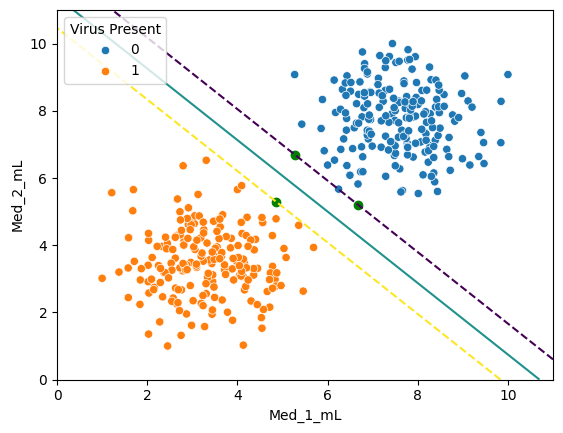

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols= 1)
sns.scatterplot(data = df, x = 'Med_1_mL', y = 'Med_2_mL', hue = 'Virus Present')
DecisionBoundaryDisplay.from_estimator(estimator=model, 
                                       X = X, 
                                       ax = ax, 
                                       plot_method= 'contour', 
                                       levels = [-1, 0, 1], linestyles = ['--', '-', '--']
                                      )
plt.scatter(x = model.support_vectors_[:,0], y = model.support_vectors_[:,1], color = 'green' );

# Radial Basis Function
- The `rbf` is the default kernel in the scikit-learn and performs well for most of the cases.
- For `kernel = 'rbf'` we need a gamma parameter that defines the width of bell-shaped curve
- `gamma` can have either float value or 'scale' or 'auto'
- where, scale is $\frac{1}{n\sigma^2}$, the 'n' is number of features, and $\sigma^2$ is the variance
- and the 'auto' is $\frac{1}{n}$, 'n' is number of features
> To tune gamma parameter we can always apply grid search

In [11]:
rbf_model = SVC(kernel = 'rbf', C= 2, gamma= 'scale')

In [12]:
rbf_model.fit(X,y)

SVC(C=2)

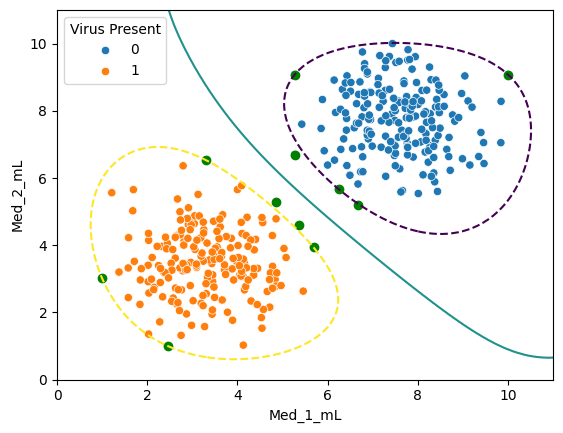

In [13]:
fig, ax = plt.subplots(ncols = 1, nrows= 1)
sns.scatterplot(data = df, x='Med_1_mL', y = 'Med_2_mL', ax= ax, hue = 'Virus Present')
DecisionBoundaryDisplay.from_estimator(estimator= rbf_model, X = X, ax = ax, 
                                       linestyles = ['--', '-', '--'], 
                                       plot_method='contour', 
                                       levels = [-1, 0, 1],)
plt.scatter(x = rbf_model.support_vectors_[:,0], y = rbf_model.support_vectors_[:,1], color = 'green');

#  Polynomial Kernel
- The `kernel = 'poly'` uses the parameter `degree` that defines the order of polynomial to apply for higher dimension projection

In [14]:
poly_model = SVC(kernel = 'poly', degree = 3, C = 2)

In [15]:
poly_model.fit(X,y)

SVC(C=2, kernel='poly')

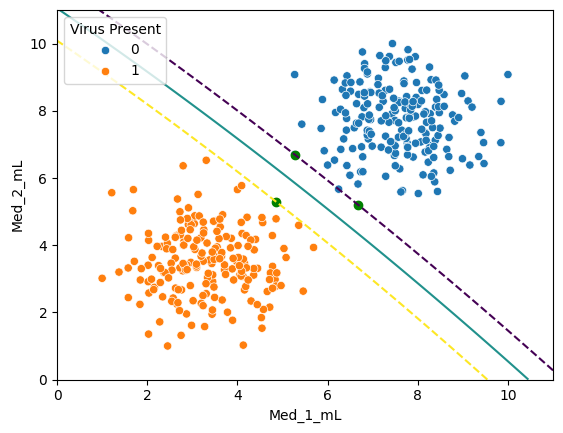

In [16]:
fig, ax = plt.subplots(ncols = 1, nrows = 1)
sns.scatterplot(data = df, x = 'Med_1_mL', y = 'Med_2_mL', hue = 'Virus Present', ax = ax)
DecisionBoundaryDisplay.from_estimator(estimator = poly_model, X = X, 
                                      plot_method = 'contour', levels = [-1, 0, 1],
                                      linestyles = ['--', '-', '--'], ax = ax)
plt.scatter(x = poly_model.support_vectors_[:,0], y = poly_model.support_vectors_[:,1], color = 'green');

# Lets apply grid search

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [19]:
base_model = SVC()

In [20]:
c = np.linspace(0,0.03, 10)
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
degrees = [1,2,3]
gamma = np.linspace(1,3, 3)

In [21]:
base_model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [22]:
grid_params = {'C': c, 'degree': degrees, 'gamma': gamma, 'kernel': kernels}

In [23]:
grid_model = GridSearchCV(estimator = base_model, param_grid= grid_params, cv = 5, verbose = 1)

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
grid_model.fit(X,y)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0.        , 0.00333333, 0.00666667, 0.01      , 0.01333333,
       0.01666667, 0.02      , 0.02333333, 0.02666667, 0.03      ]),
                         'degree': [1, 2, 3], 'gamma': array([1., 2., 3.]),
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [26]:
grid_model.best_params_

{'C': np.float64(0.003333333333333333),
 'degree': 1,
 'gamma': np.float64(1.0),
 'kernel': 'linear'}

In [27]:
# grid_model.best_estimator_.support_vectors_

In [28]:
x_support_vectors = grid_model.best_estimator_.support_vectors_[:,0]
y_support_vectors = grid_model.best_estimator_.support_vectors_[:,1]

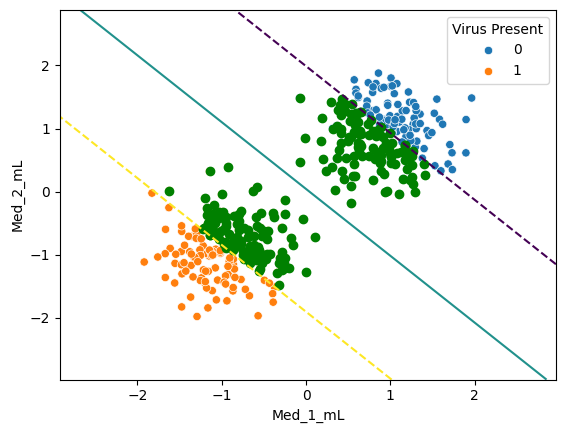

In [29]:
fig, ax = plt.subplots(ncols = 1, nrows =1)
sns.scatterplot(data = df, x = X[:,0], y = X[:,1], hue = 'Virus Present', ax =ax)
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
DecisionBoundaryDisplay.from_estimator(estimator= grid_model, X = X, plot_method= 'contour', 
                                       levels = [-1, 0, 1], linestyles = ['--', '-', '--'], ax = ax)
plt.scatter(x = x_support_vectors, y= y_support_vectors, color = 'green');

# Conclusion
- As I tune for the value of parameter `C`, I can see that it keeps on selecting lower value for C, allowing to have lots of support vectors
- The grid model have choosen linear model means best performs with linear model but at the same time tries to maximize the margin because no errors are encountered while increasing the margin, so it is trying to generalize the model with lots of support vectors included
- It is always good to generalize the model with less error but remember increasing the number of support vectors make the model complex.